
# Memahami Data

Memahami data (Data Understanding) merupakan tahap kedua pada data mining sesuai dengan CRISP-DM (The Cross-Industry Standard Process for Data Mining). Data Understanding adalah tahapan untuk memahami data secara mendalam. Di sini, kita melihat struktur datanya, memahami tipe dan distribusinya, serta mencari tahu apakah ada masalah seperti data yang hilang (Missing value), duplikasi, atau nilai yang tidak wajar (outlier). Intinya, tahap ini membantu kita memastikan bahwa data cukup bersih dan tahap ini sangat penting karena menjadi fondasi untuk analisis selanjutnya dan mempengaruhi hasil akhir.

Beberapa kegiatan  dalam memahami diantaranya adalah:


*   Pengumpulan data
*   Ekplorasi data
*   Profilling data

## Pengumpulan data terkait dengan IRIS Dataset

Jadi terdapat data yang tersimpan pada dua databse yaitu Mysql dan PostgreSQL di aiven.io. Kemudian membuat koneksi database menggunakan dbeaver. Didalam dbeaver diperlukan nama host, user, database, password yang sesuai pada server database di aiven.io untuk membuat koneksi, kemudian menginputkan data iris dengan membuat tabel iris lalu membuat kolom id, class, sepal_length, sepal_width, petal_length, petal_width pada masing-masing database. setelah itu menginputkan data iris menggunakan SQL Script. (jangan lupa refresh setiap ada perubahan)  

Disini menggunakan library pymysql untuk menghubungkan Python dengan database MySQL menggunakan protokol MySQL Connector dan library psycopg2 untuk menghubungkan Python dengan database PostgreSQL menggunakan protokol PostgreSQL Connector agar bisa mengumpulkan data iris dari masing-masing database.



### Berikut tahapan proses pengumpulan data dari mysql

In [2]:
%pip install pymysql
%pip install psycopg2

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pymysql
import os
from dotenv import load_dotenv

# Memuat variabel lingkungan dari .env
load_dotenv()

# Konfigurasi koneksi ke MySQL Aiven menggunakan variabel lingkungan
conn = pymysql.connect(
    host=os.getenv("MYSQL_HOST"),
    port=int(os.getenv("MYSQL_PORT")),
    user=os.getenv("MYSQL_USER"),
    password=os.getenv("MYSQL_PASSWORD"),
    database=os.getenv("MYSQL_DATABASE"),
    ssl={'ssl': {}}  # Mengaktifkan SSL
)

try:
    # Membuat cursor
    cursor = conn.cursor()

    # Eksekusi query untuk mengambil data
    query = "SELECT * FROM iris"
    cursor.execute(query)

    # Mengambil semua hasil
    data = cursor.fetchall()

    # Menampilkan data
    for row in data:
        print(row)

except pymysql.MySQLError as e:
    print("Error saat mengambil data:", e)

finally:
    # Menutup koneksi
    if cursor:
        cursor.close()
    if conn:
        conn.close()

(1, 'Iris-setosa', 86.4, 70.0)
(2, 'Iris-setosa', 1.4, 0.2)
(3, 'Iris-setosa', 1.3, 0.2)
(4, 'Iris-setosa', 1.5, 0.2)
(5, 'Iris-setosa', 1.4, 0.2)
(6, 'Iris-setosa', 1.7, 0.4)
(7, 'Iris-setosa', 1.4, 0.3)
(8, 'Iris-setosa', 1.5, 0.2)
(9, 'Iris-setosa', 1.4, 0.2)
(10, 'Iris-setosa', 1.5, 0.1)
(11, 'Iris-setosa', 1.5, 0.2)
(12, 'Iris-setosa', 1.6, 0.2)
(13, 'Iris-setosa', 1.4, 0.1)
(14, 'Iris-setosa', 1.1, 0.1)
(15, 'Iris-setosa', 1.2, 0.2)
(16, 'Iris-setosa', 1.5, 0.4)
(17, 'Iris-setosa', 1.3, 0.4)
(18, 'Iris-setosa', 1.4, 0.3)
(19, 'Iris-setosa', 1.7, 0.3)
(20, 'Iris-setosa', 1.5, 0.3)
(21, 'Iris-setosa', 1.7, 0.2)
(22, 'Iris-setosa', 1.5, 0.4)
(23, 'Iris-setosa', 1.0, 0.2)
(24, 'Iris-setosa', 1.7, 0.5)
(25, 'Iris-setosa', 1.9, 0.2)
(26, 'Iris-setosa', 1.6, 0.2)
(27, 'Iris-setosa', 1.6, 0.4)
(28, 'Iris-setosa', 1.5, 0.2)
(29, 'Iris-setosa', 1.4, 0.2)
(30, 'Iris-setosa', 1.6, 0.2)
(31, 'Iris-setosa', 1.6, 0.2)
(32, 'Iris-setosa', 1.5, 0.4)
(33, 'Iris-setosa', 1.5, 0.1)
(34, 'Iris-setosa

### Berikut pengumpulan data dari Postgresql

In [4]:
import psycopg2
import os
from dotenv import load_dotenv

# Memuat variabel dari file .env
load_dotenv()

try:
    # Koneksi ke PostgreSQL di Aiven
    conn = psycopg2.connect(
        host=os.getenv("POSTGRES_HOST"),
        port=os.getenv("POSTGRES_PORT"),
        user=os.getenv("POSTGRES_USER"),
        password=os.getenv("POSTGRES_PASSWORD"),
        database=os.getenv("POSTGRES_DATABASE"),
        sslmode="require"  # Wajib pakai SSL untuk keamanan
    )

    # Membuat cursor
    cursor = conn.cursor()

    # Eksekusi query untuk mengambil data dari tabel (misal: "iris")
    query = "SELECT * FROM iris"
    cursor.execute(query)

    # Mengambil semua hasil
    data = cursor.fetchall()

    # Menampilkan data
    for row in data:
        print(row)

except psycopg2.Error as e:
    print("Error saat menyambung ke PostgreSQL:", e)

finally:
    # Menutup koneksi
    if cursor:
        cursor.close()
    if conn:
        conn.close()

(2, 'Iris-setosa', 4.9, 3.0)
(3, 'Iris-setosa', 4.7, 3.2)
(4, 'Iris-setosa', 4.6, 3.1)
(5, 'Iris-setosa', 5.0, 3.6)
(6, 'Iris-setosa', 5.4, 3.9)
(7, 'Iris-setosa', 4.6, 3.4)
(8, 'Iris-setosa', 5.0, 3.4)
(9, 'Iris-setosa', 4.4, 2.9)
(10, 'Iris-setosa', 4.9, 3.1)
(11, 'Iris-setosa', 5.4, 3.7)
(12, 'Iris-setosa', 4.8, 3.4)
(13, 'Iris-setosa', 4.8, 3.0)
(14, 'Iris-setosa', 4.3, 3.0)
(15, 'Iris-setosa', 5.8, 4.0)
(16, 'Iris-setosa', 5.7, 4.4)
(17, 'Iris-setosa', 5.4, 3.9)
(18, 'Iris-setosa', 5.1, 3.5)
(19, 'Iris-setosa', 5.7, 3.8)
(20, 'Iris-setosa', 5.1, 3.8)
(21, 'Iris-setosa', 5.4, 3.4)
(22, 'Iris-setosa', 5.1, 3.7)
(23, 'Iris-setosa', 4.6, 3.6)
(24, 'Iris-setosa', 5.1, 3.3)
(25, 'Iris-setosa', 4.8, 3.4)
(26, 'Iris-setosa', 5.0, 3.0)
(27, 'Iris-setosa', 5.0, 3.4)
(28, 'Iris-setosa', 5.2, 3.5)
(29, 'Iris-setosa', 5.2, 3.4)
(30, 'Iris-setosa', 4.7, 3.2)
(31, 'Iris-setosa', 4.8, 3.1)
(32, 'Iris-setosa', 5.4, 3.4)
(33, 'Iris-setosa', 5.2, 4.1)
(34, 'Iris-setosa', 5.5, 4.2)
(35, 'Iris-setosa'

### Berikut cara menggabungkan data dari database Mysql dan Postgresql

In [5]:
%pip install pandas
%pip install sqlalchemy

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [6]:
import pymysql
import psycopg2
import pandas as pd
from sqlalchemy import create_engine
import os
from dotenv import load_dotenv

# Memuat variabel dari file .env
load_dotenv()

# Buat engine SQLAlchemy untuk MySQL
mysql_engine = create_engine(
    f"mysql+pymysql://{os.getenv('MYSQL_USER')}:{os.getenv('MYSQL_PASSWORD')}"
    f"@{os.getenv('MYSQL_HOST')}:{os.getenv('MYSQL_PORT')}/{os.getenv('MYSQL_DATABASE')}"
)

# Buat engine SQLAlchemy untuk PostgreSQL
postgres_engine = create_engine(
    f"postgresql+psycopg2://{os.getenv('POSTGRES_USER')}:{os.getenv('POSTGRES_PASSWORD')}"
    f"@{os.getenv('POSTGRES_HOST')}:{os.getenv('POSTGRES_PORT')}/{os.getenv('POSTGRES_DATABASE')}"
)

# Query untuk mengambil data
mysql_query = "SELECT id, class, petal_length, petal_width FROM iris"
postgres_query = "SELECT id, sepal_length, sepal_width FROM iris"

try:
    # Ambil data dari MySQL dan PostgreSQL sebagai DataFrame Pandas
    df_mysql = pd.read_sql(mysql_query, mysql_engine)
    df_postgres = pd.read_sql(postgres_query, postgres_engine)

    # Gabungkan Data berdasarkan 'id'
    df_combined = pd.merge(df_mysql, df_postgres, on="id", how="inner")

    # Tampilkan hasil
    print(df_combined.head())

    # Simpan hasil ke CSV dengan encoding UTF-8
    df_combined.to_csv("hasil_gabungan.csv", index=False, encoding="utf-8")
    print("Data berhasil disimpan ke 'hasil_gabungan.csv'.")

except Exception as e:
    print("Terjadi kesalahan:", e)

finally:
    mysql_engine.dispose()
    postgres_engine.dispose()

   id        class  petal_length  petal_width  sepal_length  sepal_width
0   1  Iris-setosa          86.4         70.0          20.1         30.5
1   2  Iris-setosa           1.4          0.2           4.9          3.0
2   3  Iris-setosa           1.3          0.2           4.7          3.2
3   4  Iris-setosa           1.5          0.2           4.6          3.1
4   5  Iris-setosa           1.4          0.2           5.0          3.6
Data berhasil disimpan ke 'hasil_gabungan.csv'.


## Ekplorasi data set IRIS
Menentukan nilai mean, median, mode, standar deviasi, minimum, maksimum dan nilai missing dari data iris yang telah digabung

In [7]:
import pandas as pd

# Baca file CSV
df = pd.read_csv("hasil_gabungan.csv")

# Hapus kolom 'id' dari analisis statistik deskriptif jika ada
if 'id' in df.columns:
    df_numeric = df.select_dtypes(include=['number']).drop(columns=['id'])
else:
    df_numeric = df.select_dtypes(include=['number'])

# Hitung statistik deskriptif yang diminta
stats = pd.DataFrame({
    "Mean": df_numeric.mean(),
    "Median": df_numeric.median(),
    "Mode": df_numeric.mode().iloc[0],  # Mode bisa lebih dari satu nilai, ambil yang pertama
    "Std Dev": df_numeric.std(ddof=0),  # Standar deviasi sampel (default Pandas)
    "Min": df_numeric.min(),
    "Max": df_numeric.max(),
    "Missing": df_numeric.isnull().sum()
})

# Tampilkan hasil
print(stats)
print("\n")
print(df.info())

                  Mean  Median  Mode   Std Dev  Min   Max  Missing
petal_length  4.688667     4.4   1.5  8.315732  1.0  86.4        0
petal_width   1.916000     1.3   0.2  6.465004  0.1  70.0        0
sepal_length  6.368667     5.8   5.0  5.411212  4.3  70.1        0
sepal_width   3.546000     3.0   3.0  4.440760  2.0  50.1        0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            150 non-null    int64  
 1   class         150 non-null    object 
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   sepal_length  150 non-null    float64
 5   sepal_width   150 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None


## Visualisasi Data Histogram : untuk melihat distribusi data numerik.

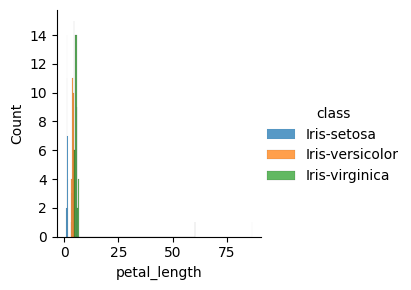

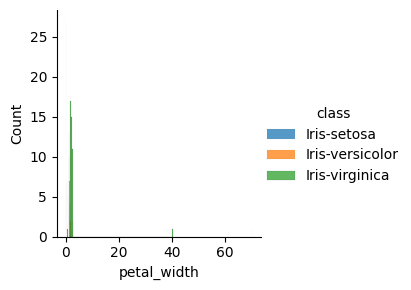

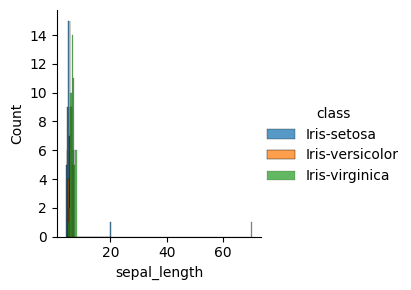

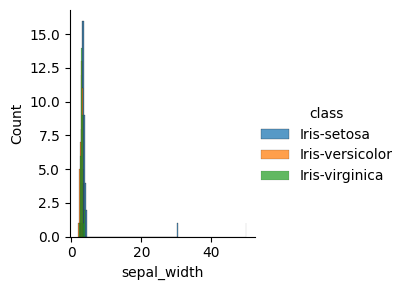

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# histogram untuk semua kolom numerik
iris=pd.read_csv("hasil_gabungan.csv")
sns.FacetGrid(iris, hue="class", height=3).map(sns.histplot, "petal_length").add_legend()
sns.FacetGrid(iris, hue="class", height=3).map(sns.histplot, "petal_width").add_legend()
sns.FacetGrid(iris, hue="class", height=3).map(sns.histplot, "sepal_length").add_legend()
sns.FacetGrid(iris, hue="class", height=3).map(sns.histplot, "sepal_width").add_legend()
plt.show()

## Visualisasi Data Scatter Plot: Untuk melihat hubungan antara dua variabel numerik.

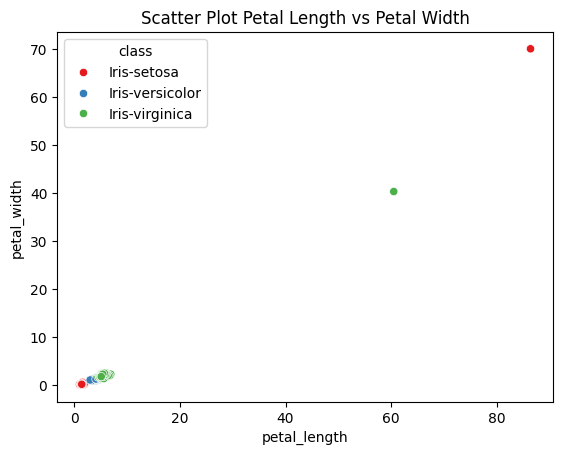

In [9]:
# Scatter plot antara panjang kelopak dan lebar kelopak
sns.scatterplot(data=df, x="petal_length", y="petal_width", hue="class", palette="Set1")
plt.title("Scatter Plot Petal Length vs Petal Width")
plt.show()

## Profiling data set IRIS

In [10]:
%pip install ydata-profiling
%pip install ipywidgets

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [11]:
import pandas as pd
from ydata_profiling import ProfileReport

#baca dataset
df = pd.read_csv("hasil_gabungan.csv")

#laporan profiling
profile = ProfileReport(df, explorative = True)

# Simpan laporan ke file HTML
profile.to_file("iris_profiling_report.html")

# Tampilkan di notebook (opsional)
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## Macam-macam tipe data didalam data mining    

1. Nominal / kategorikal  
Atribut nominal adalah tipe data yang hanya digunakan untuk memberi label atau kategori pada suatu objek tanpa memiliki urutan atau tingkatan tertentu. Data ini tidak memiliki makna numerik dan tidak bisa dilakukan perhitungan matematika seperti penjumlahan atau pengurangan. Misalnya, dalam sebuah survei, seseorang mungkin ditanya tentang warna rambutnya. Jawaban seperti "Hitam", "Coklat", atau "Pirang" tidak memiliki tingkatan yang menunjukkan bahwa satu warna lebih tinggi dari yang lain. Warna rambut hanya digunakan untuk mengelompokkan individu berdasarkan kategori tertentu.

2. Ordinal  
Atribut ordinal adalah data yang memiliki kategori seperti nominal, tetapi dengan urutan atau tingkatan tertentu. Meskipun ada urutan, jarak antara satu kategori dengan kategori lainnya tidak bisa diukur secara pasti. Misalnya terdapat tingkatan pendidikan (SD, SMP, SMA, S1, S2, S3) dan tingkatan risiko investasi (Rendah, Sedang, Tinggi). Semua memiliki urutan, tetapi tidak ada kepastian mengenai seberapa besar jarak antara satu tingkat ke tingkat berikutnya.  

3. Numeriks  
Atribut numerik adalah tipe data yang merepresentasikan nilai angka dan dapat digunakan dalam perhitungan matematika, seperti penjumlahan, pengurangan, perkalian, atau pembagian. Data ini umumnya diperoleh melalui proses pengukuran atau penghitungan.  
* Diskrit  
Data diskrit adalah data yang hanya bisa memiliki nilai dalam jumlah terbatas, biasanya dalam bentuk bilangan bulat. Data ini diperoleh dari proses penghitungan (counting), bukan pengukuran. Misalnya, jumlah anak dalam satu keluarga bisa bernilai 0, 1, 2, 3, atau lebih, tetapi tidak mungkin bernilai 2,5 anak. Begitu juga dengan jumlah mobil di parkiran atau jumlah siswa dalam kelas. Semua data ini tidak memiliki nilai pecahan karena jumlahnya dihitung sebagai angka yang bulat.  

* Kontinu  
Data kontinu adalah data numerik yang bisa memiliki nilai pecahan atau desimal karena diperoleh melalui pengukuran (measurement). Nilainya bisa bervariasi dalam rentang tertentu dan dapat dibagi menjadi bagian yang lebih kecil tanpa kehilangan makna. Misalnya, tinggi seseorang bisa bernilai 165,3 cm, berat badan bisa 60,5 kg, dan suhu udara bisa 28,7°C. Dalam semua contoh ini, nilainya tidak terbatas pada angka bulat karena pengukuran yang lebih presisi dapat memberikan angka yang lebih detail.


##  Konsep Outlier Detection dengan KNN (K-Nearest Neighbors)  

Metode KNN untuk deteksi outlier didasarkan pada jarak antara sebuah titik data dengan titik-titik terdekatnya (neighbors). Jika sebuah titik data memiliki jarak yang jauh dari tetangganya, maka kemungkinan besar titik tersebut adalah outlier.  

#### Langkah-langkah :  
1. Menghitung jarak antara data baru dan semua data dalam dataset menggunakan rumus Euclidian Distance / Manhattan Distance / Minkowski Distance . 
2. Memilih K tetangga terdekat. 
3. Merangking hasil perhitungan jarak secara ascending, dan jarak yang paling besar bisa disebut outlier.
3. Untuk klasifikasi : ambil mayoritas kelas dari K tetangga.  
4. Untuk regresi : ambil rata-rata nilai dari K tetangga.  

#### Metode menghitung jarak : 
1. Euclidian Distance  
Euclidian Distance merupakan metrik jarak yang banyak digunakan. Secara matematis, jarak ini adalah akar kuadrat dari jumlah selisih antara dua titik data yang berbeda. Rumus : $$\sqrt{(x_2 - x_1)^2 + (y_2 - y_1)^2}$$  



2. Manhattan Distance  
Manhattan Distance digunakan untuk menghitung jarak antara dua koordinat dalam jalur seperti grid.  
Rumus : $$|x_2 - x_1| + |y_2 - y_1|$$ 

3. Minkowski Distance  
Minkowski Distance merupakan generalisasi dari metrik jarak Euclidean dan Manhattan.  
Rumus : $$\left( |x_2 - x_1|^p + |y_2 - y_1|^p \right)^{\frac{1}{p}}$$


#### Pemilihan Nilai 𝐾 :  
1. Jika 𝐾 kecil :  
* Model sangat sensitif terhadap noise → Jika ada outlier atau data yang tidak representatif, model bisa salah memprediksi karena hanya bergantung pada satu atau sedikit tetangga.  

* Overfitting → Model terlalu spesifik terhadap data latih, sehingga kurang bisa melakukan generalisasi pada data baru.  

2. Jika 𝐾 besar :  
* Model menjadi terlalu sederhana (underfitting) → Tidak menangkap pola lokal dalam data.  
* Prediksi lebih stabil, tetapi bisa kehilangan informasi penting karena dipengaruhi oleh terlalu banyak tetangga.

3. Solusi : mencari nilai 𝐾 optimal dengan eksperimen, misalnya menggunakan cross-validation.  

#### Contoh perhitungan :  
Misalkan kita memiliki 10 data :  
$$
\begin{array}{|c|c|c|}
\hline
Class & x & y \\
\hline
A & 2 & 3 \\
A & 3 & 5 \\
A & 5 & 8 \\
B & 6 & 9 \\
B & 4 & 8 \\
B & 5 & 9 \\
A & 6 & 5 \\
A & 3 & 7 \\
B & 20 & 25 \\
? & 3 & 3 \\
\hline
\end{array}
$$  

1. Menghitung jarak dengan Euclidian distance  
$$\sqrt{(x_2 - x_1)^2 + (y_2 - y_1)^2}$$  

* d1 (2,3)  
$$\sqrt{(2 - 3)^2 + (3 - 3)^2} = 1 $$  
* d2 (3,5)  
$$\sqrt{(3 - 3)^2 + (5 - 3)^2} = 2 $$  
* d3 (5,8)  
$$\sqrt{(5 - 3)^2 + (8 - 3)^2} = 5.39$$  
* d4 (6,9)  
$$\sqrt{(6 - 3)^2 + (9 - 3)^2} = 6.71$$  
* d5 (4,8)  
$$\sqrt{(4 - 3)^2 + (8 - 3)^2} = 5.10$$  
* d6 (5,9)  
$$\sqrt{(5 - 3)^2 + (9 - 3)^2} = 6.32 $$  
* d7 (6,5)  
$$\sqrt{(6 - 3)^2 + (5 - 3)^2} = 3.61$$  
* d8 (3,7)  
$$\sqrt{(3 - 3)^2 + (7 - 3)^2} = 4 $$  
* d9 (2,4)  
$$\sqrt{(20 - 3)^2 + (25 - 3)^2} = 27.80$$  

2. Merangking data secara ascending (kecil-besar), jika K= 3, maka akan diambil dari 3 teratas.  

    1. d1 A (1)
    2. d2 A (2)  
    3. d7 A (3.61)  
    4. d8 A (4)  
    5. d5 B (5.10)  
    6. d3 A (5.39)  
    7. d6 B (6.32)  
    8. d4 B (6.71)  
    9. d5 B(27.80)  

Kesimpulan : jadi nilai yang dicari termasuk class A dan outlier pada data diatas ditunjukkan pada data ke 9, karena memiliki jarak yang paling jauh/besar.  


#### Algoritma mendeteksi outlier pada Data Iris : 

ID Outlier terdeteksi: [  1 101]


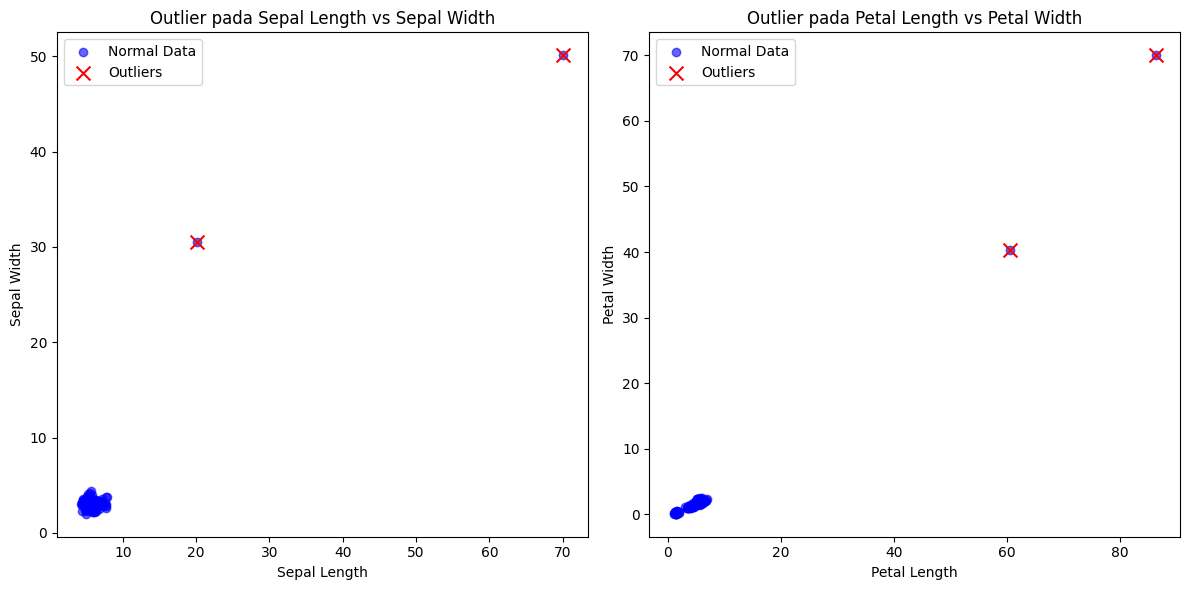

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

# Load dataset
file_path = "hasil_gabungan.csv"
data = pd.read_csv(file_path)

# Simpan ID jika ada
id_column = data['id'] if 'id' in data.columns else None

# Pilih hanya kolom yang digunakan untuk deteksi outlier
selected_columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
data = data[selected_columns]

# Konversi semua kolom ke numerik (jika ada string, akan diubah menjadi NaN)
data = data.apply(pd.to_numeric, errors='coerce')

# Drop baris yang mengandung NaN
data = data.dropna()

# Ambil data sebagai array X
X = data.values

# Deteksi Outlier dengan K-Nearest Neighbors (KNN)
knn = NearestNeighbors(n_neighbors=3)
knn.fit(X)

# Hitung jarak ke tetangga terdekat
distances_knn, _ = knn.kneighbors(X)
mean_knn_distances = np.mean(distances_knn[:, 1:], axis=1)  # Rata-rata jarak ke tetangga

# Tentukan threshold outlier
threshold_knn = np.mean(mean_knn_distances) + 2.5 * np.std(mean_knn_distances)
outliers_knn = np.where(mean_knn_distances > threshold_knn)[0]

# Tampilkan hasil dengan ID jika ada
if id_column is not None:
    outlier_ids = id_column.iloc[outliers_knn].values
    print(f"ID Outlier terdeteksi: {outlier_ids}")
else:
    print(f"Outlier terdeteksi (index): {outliers_knn}")

# Visualisasi Data dalam berbagai kombinasi
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Scatter plot Sepal Length vs Sepal Width
axs[0].scatter(X[:, 0], X[:, 1], label='Normal Data', color='blue', alpha=0.6)
axs[0].scatter(X[outliers_knn, 0], X[outliers_knn, 1], label='Outliers', color='red', marker='x', s=100)
axs[0].set_xlabel('Sepal Length')
axs[0].set_ylabel('Sepal Width')
axs[0].set_title('Outlier pada Sepal Length vs Sepal Width')
axs[0].legend()

# Scatter plot Petal Length vs Petal Width
axs[1].scatter(X[:, 2], X[:, 3], label='Normal Data', color='blue', alpha=0.6)
axs[1].scatter(X[outliers_knn, 2], X[outliers_knn, 3], label='Outliers', color='red', marker='x', s=100)
axs[1].set_xlabel('Petal Length')
axs[1].set_ylabel('Petal Width')
axs[1].set_title('Outlier pada Petal Length vs Petal Width')
axs[1].legend()

plt.tight_layout()
plt.show()

## LOF (Local Outlier Factor)  
LOF merupakan sebuah metode untuk mendeteksi outlier dengan menghitung deviasi kerapatan lokal dari titik tertentu terhadap tetangganya. Pada metode ini jika sebuah sampel memiliki kerapatan jauh lebih rendah dari tetangganya maka disebut outlier.  

### Contoh 10 data :  
Misalkan kita memiliki 10 data :  
$$
\begin{array}{|c|c|c|}
\hline
Class & x & y \\
\hline
1 & 2 & 4 \\
2 & 3 & 6 \\
3 & 1 & 4 \\
4 & 4 & 3 \\
5 & 3 & 2 \\
6 & 5 & 3 \\
7 & 6 & 4 \\
8 & 4 & 3 \\
9 & 2 & 5 \\
10 & 15 & 20 \\
\hline
\end{array}
$$  

### Langkah-langkah LOF :  

 
### 1. Menentukan jumlah tetangga terdekat (k-nearest neighbors).  
* Jika nilai k = 3, artinya kita akan mencari tiga tetangga terdekat untuk setiap titik.  
* Menghitung jarak dengan rumus Euclidian Distance antara setiap pasangan titik, dengan rumus :  

$$\sqrt{(x_2 - x_1)^2 + (y_2 - y_1)^2}$$

#### Hasil jarak setiap titik :  

$d(1,2) = \sqrt{(3 - 2)^2 + (6 - 4)^2} = 2.236....(3)$  
$d(1,3) = \sqrt{(1 - 2)^2 + (4 - 4)^2} = 1....(1)$  
$d(1,4) = \sqrt{(4 - 2)^2 + (3 - 4)^2} = 2.236$,  
$d(1,5) = \sqrt{(3 - 2)^2 + (2 - 4)^2} = 2.236$,  
$d(1,6) = \sqrt{(5 - 2)^2 + (3 - 4)^2} = 3.162$,  
$d(1,7) = \sqrt{(6 - 2)^2 + (4 - 4)^2} = 4$,  
$d(1,8) = \sqrt{(4 - 2)^2 + (3 - 4)^2} = 2.236$,  
$d(1,9) = \sqrt{(2 - 2)^2 + (5 - 4)^2} = 1....(2)$  
$d(1,10) = \sqrt{(15 - 2)^2 + (20 - 4)^2} = 20.616$.  

$d(2,1) = \sqrt{(2 - 3)^2 + (4 - 6)^2} = 2.236....(2)$,    
$d(2,3) = \sqrt{(1 - 3)^2 + (4 - 6)^2} = 2.828....(3)$,  
$d(2,4) = \sqrt{(4 - 3)^2 + (3 - 6)^2} = 3.162$,  
$d(2,5) = \sqrt{(3 - 3)^2 + (2 - 6)^2} = 4$,  
$d(2,6) = \sqrt{(5 - 3)^2 + (3 - 6)^2} = 3.606$,  
$d(2,7) = \sqrt{(6 - 3)^2 + (4 - 6)^2} = 3.606$,  
$d(2,8) = \sqrt{(4 - 3)^2 + (3 - 6)^2} = 3.162$,  
$d(2,9) = \sqrt{(2 - 3)^2 + (5 - 6)^2} = 1.414....(1)$  
$d(2,10) = \sqrt{(15 - 3)^2 + (20 - 6)^2} = 18.439$.  

$d(3,1) = \sqrt{(2 - 1)^2 + (4 - 4)^2} = 1....(1)$,  
$d(3,2) = \sqrt{(3 - 1)^2 + (6 - 4)^2} = 2.828....(3)$,    
$d(3,4) = \sqrt{(4 - 1)^2 + (3 - 4)^2} = 3.162$,  
$d(3,5) = \sqrt{(3 - 1)^2 + (2 - 4)^2} = 2.828$,  
$d(3,6) = \sqrt{(5 - 1)^2 + (3 - 4)^2} = 4.123$,  
$d(3,7) = \sqrt{(6 - 1)^2 + (4 - 4)^2} = 5$,  
$d(3,8) = \sqrt{(4 - 1)^2 + (3 - 4)^2} = 3.162$,  
$d(3,9) = \sqrt{(2 - 1)^2 + (5 - 4)^2} = 1.414....(2)$,  
$d(3,10) = \sqrt{(15 - 1)^2 + (20 - 4)^2} = 21.260$.  

$d(4,1) = \sqrt{(2 - 4)^2 + (4 - 3)^2} = 2.236$,  
$d(4,2) = \sqrt{(3 - 4)^2 + (6 - 3)^2} = 3.162$,  
$d(4,3) = \sqrt{(1 - 4)^2 + (4 - 3)^2} = 3.162$,   
$d(4,5) = \sqrt{(3 - 4)^2 + (2 - 3)^2} = 1.414....(3)$,  
$d(4,6) = \sqrt{(5 - 4)^2 + (3 - 3)^2} = 1....(2)$,  
$d(4,7) = \sqrt{(6 - 4)^2 + (4 - 3)^2} = 2.236$,  
$d(4,8) = \sqrt{(4 - 4)^2 + (3 - 3)^2} = 0....(1)$,  
$d(4,9) = \sqrt{(2 - 4)^2 + (5 - 3)^2} = 2.828$,  
$d(4,10) = \sqrt{(15 - 4)^2 + (20 - 3)^2} = 20.248$.  

$d(5,1) = \sqrt{(2 - 3)^2 + (4 - 2)^2} = 2.236....(3)$,  
$d(5,2) = \sqrt{(3 - 3)^2 + (6 - 2)^2} = 4$,  
$d(5,3) = \sqrt{(1 - 3)^2 + (4 - 2)^2} = 2.828$,  
$d(5,4) = \sqrt{(4 - 3)^2 + (3 - 2)^2} = 1.414....(1)$,    
$d(5,6) = \sqrt{(5 - 3)^2 + (3 - 2)^2} = 2.236$,  
$d(5,7) = \sqrt{(6 - 3)^2 + (4 - 2)^2} = 3.606$,  
$d(5,8) = \sqrt{(4 - 3)^2 + (3 - 2)^2} = 1.414....(2)$,  
$d(5,9) = \sqrt{(2 - 3)^2 + (5 - 2)^2} = 3.162$,  
$d(5,10) = \sqrt{(15 - 3)^2 + (20 - 2)^2} = 21.633$.  


$d(6,1) = \sqrt{(2 - 5)^2 + (4 - 3)^2} = 3.162$,  
$d(6,2) = \sqrt{(3 - 5)^2 + (6 - 3)^2} = 3.606$,  
$d(6,3) = \sqrt{(1 - 5)^2 + (4 - 3)^2} = 4.123$,  
$d(6,4) = \sqrt{(4 - 5)^2 + (3 - 3)^2} = 1....(1)$,  
$d(6,5) = \sqrt{(3 - 5)^2 + (2 - 3)^2} = 2.236$.  
$d(6,7) = \sqrt{(6 - 5)^2 + (4 - 3)^2} = 1.414....(3)$,  
$d(6,8) = \sqrt{(4 - 5)^2 + (3 - 3)^2} = 1....(2)$,  
$d(6,9) = \sqrt{(2 - 5)^2 + (5 - 3)^2} = 3.606$,  
$d(6,10) = \sqrt{(15 - 5)^2 + (20 - 3)^2} = 19.723$.  

$d(7,1) = \sqrt{(2 - 6)^2 + (4 - 4)^2} = 4$,  
$d(7,2) = \sqrt{(3 - 6)^2 + (6 - 4)^2} = 3.606$,  
$d(7,3) = \sqrt{(1 - 6)^2 + (4 - 4)^2} = 5$,  
$d(7,4) = \sqrt{(4 - 6)^2 + (3 - 4)^2} = 2.236....(2)$,  
$d(7,5) = \sqrt{(3 - 6)^2 + (2 - 4)^2} = 3.606$.  
$d(7,6) = \sqrt{(5 - 6)^2 + (3 - 4)^2} = 1.414....(1)$,  
$d(7,8) = \sqrt{(4 - 6)^2 + (3 - 4)^2} = 2.236....(3)$,  
$d(7,9) = \sqrt{(2 - 6)^2 + (5 - 4)^2} = 4.123$,  
$d(7,10) = \sqrt{(15 - 6)^2 + (20 - 4)^2} = 18.358$.  

$d(8,1) = \sqrt{(2 - 4)^2 + (4 - 3)^2} = 2.236$,  
$d(8,2) = \sqrt{(3 - 4)^2 + (6 - 3)^2} = 3.162$,  
$d(8,3) = \sqrt{(1 - 4)^2 + (4 - 3)^2} = 3.162$,  
$d(8,4) = \sqrt{(4 - 4)^2 + (3 - 3)^2} = 0....(1)$,  
$d(8,5) = \sqrt{(3 - 4)^2 + (2 - 3)^2} = 1.414....(3)$.  
$d(8,6) = \sqrt{(5 - 4)^2 + (3 - 3)^2} = 1....(2)$,  
$d(8,7) = \sqrt{(6 - 4)^2 + (4 - 3)^2} = 2.236$,  
$d(8,9) = \sqrt{(2 - 4)^2 + (5 - 3)^2} = 2.828$,  
$d(8,10) = \sqrt{(15 - 4)^2 + (20 - 3)^2} = 20.248$.  

$d(9,1) = \sqrt{(2 - 2)^2 + (4 - 5)^2} = 1....(1)$,  
$d(9,2) = \sqrt{(3 - 2)^2 + (6 - 5)^2} = 1.414....(2)$,  
$d(9,3) = \sqrt{(1 - 2)^2 + (4 - 5)^2} = 1.414....(3)$,  
$d(9,4) = \sqrt{(4 - 2)^2 + (3 - 5)^2} = 2.828$,  
$d(9,5) = \sqrt{(3 - 2)^2 + (2 - 5)^2} = 3.162$.  
$d(9,6) = \sqrt{(5 - 2)^2 + (3 - 5)^2} = 3.606$,  
$d(9,7) = \sqrt{(6 - 2)^2 + (4 - 5)^2} = 4.123$,  
$d(9,8) = \sqrt{(4 - 2)^2 + (3 - 5)^2} = 2.828$,  
$d(9,10) = \sqrt{(15 - 2)^2 + (20 - 5)^2} = 19.849$.  

$d(10,1) = \sqrt{(2 - 15)^2 + (4 - 20)^2} = 20.616$,  
$d(10,2) = \sqrt{(3 - 15)^2 + (6 - 20)^2} = 18.439$,  
$d(10,3) = \sqrt{(1 - 15)^2 + (4 - 20)^2} = 21.260$,  
$d(10,4) = \sqrt{(4 - 15)^2 + (3 - 20)^2} = 20.248$,  
$d(10,5) = \sqrt{(3 - 15)^2 + (2 - 20)^2} = 21.633$.  
$d(10,6) = \sqrt{(5 - 15)^2 + (3 - 20)^2} = 19.723....(3)$,  
$d(10,7) = \sqrt{(6 - 15)^2 + (4 - 20)^2} = 18.358....(1)$,  
$d(10,8) = \sqrt{(4 - 15)^2 + (3 - 20)^2} = 20.248$,  
$d(10,9) = \sqrt{(2 - 15)^2 + (5 - 20)^2} = 19.849....(2)$.  

#### 3 tetangga terdekat untuk setiap titik  

$$
\begin{array}{|c|c|c|}
\hline
Class & K-Neighbors \\
\hline
1 & 3,9,2 \\
2 & 9,1,3 \\
3 & 1,9,2 \\
4 & 8,6,5 \\
5 & 4,8,1 \\
6 & 4,8,7 \\
7 & 6,4,8 \\
8 & 4,6,5 \\
9 & 1,2,3 \\
10 & 7,9,6 \\
\hline
\end{array}
$$ 




### 2. Menghitung reachability distance untuk setiap titik.  

$$RD_k(A, B) = \max ({ k\text{-}distance(B), d(A, B) })$$  

#### Penjelasan : 
* $RD_k(A,B) =$ Reachability Distance dari titik $A$ ke titik $B$.  
* $k\text{-}distance(B) =$ jarak antara titik 𝐵 dan tetangga terdekatnya ke-𝑘
* $d(A,B) =$ jarak antara titik $A$ dan $B$.  

#### Hasil RD setiap titik :  

$RD(1,2) = \max ({ 3\text{-}distance(2), d(1, 2) }) = \max(2.828427125,2.236067977) = 2.828427125$  
$RD(1,3) = \max ({ 3\text{-}distance(3), d(1, 3) }) = 2,828427125$  
$RD(1,4) = \max ({ 3\text{-}distance(4), d(1, 4) })= 2,236067977$,  
$RD(1,5) = \max ({ 3\text{-}distance(5), d(1, 5) }) = 2,236067977$,  
$RD(1,6) = \max ({ 3\text{-}distance(6), d(1, 6) }) = 3,16227766$,  
$RD(1,7) = \max ({ 3\text{-}distance(7), d(1, 7) }) = 4$,  
$RD(1,8) = \max ({ 3\text{-}distance(8), d(1, 8) }) = 2,236067977$,  
$RD(1,9) = \max ({ 3\text{-}distance(9), d(1, 9) }) = 1,414213562$  
$RD(1,10) = \max ({ 3\text{-}distance(10), d(1, 10)}) = 20,61552813$.  

$RD(2,1) = \max ({ 3\text{-}distance(1), d(2, 1) }) = 2,236067977$  
$RD(2,3) = \max ({ 3\text{-}distance(3), d(2, 3) }) = 2,828427125$  
$RD(2,4) = \max ({ 3\text{-}distance(4), d(2, 4) }) = 3,16227766$,  
$RD(2,5) = \max ({ 3\text{-}distance(5), d(2, 5) }) = 4$,  
$RD(2,6) = \max ({ 3\text{-}distance(6), d(2, 6) }) = 3,605551275$,  
$RD(2,7) = \max ({ 3\text{-}distance(7), d(2, 7) }) = 3,605551275$,  
$RD(2,8) = \max ({ 3\text{-}distance(8), d(2, 8) }) = 3,16227766$,  
$RD(2,9) = \max ({ 3\text{-}distance(9), d(2, 9) }) = 1,414213562$  
$RD(2,10) = \max ({ 3\text{-}distance(10), d(2, 10) }) = 18,43908891$.  

$RD(3,1) = \max ({ 3\text{-}distance(1), d(3, 1) }) = 2,236067977$  
$RD(3,2) = \max ({ 3\text{-}distance(2), d(3, 2) }) = 2,828427125$  
$RD(3,4) = \max ({ 3\text{-}distance(4), d(3, 4) }) = 3,16227766$,  
$RD(3,5) = \max ({ 3\text{-}distance(5), d(3, 5) }) = 2,828427125$,  
$RD(3,6) = \max ({ 3\text{-}distance(6), d(3, 6) }) = 4,123105626$,  
$RD(3,7) = \max ({ 3\text{-}distance(7), d(3, 7) }) = 5$,  
$RD(3,8) = \max ({ 3\text{-}distance(8), d(3, 8) }) = 3,16227766$,  
$RD(3,9) = \max ({ 3\text{-}distance(9), d(3, 9) }) = 1,414213562$  
$RD(3,10) = \max ({ 3\text{-}distance(10), d(3, 10) }) = 21,26029163$.  

$RD(4,1) = \max ({ 3\text{-}distance(1), d(4, 1) }) = 2,236067977$  
$RD(4,2) = \max ({ 3\text{-}distance(2), d(4, 2) }) = 3,16227766$  
$RD(4,3) = \max ({ 3\text{-}distance(3), d(4, 3) }) = 3,16227766$,  
$RD(4,5) = \max ({ 3\text{-}distance(5), d(4, 5) }) = 2,236067977$,  
$RD(4,6) = \max ({ 3\text{-}distance(6), d(4, 6) }) = 1,414213562$,  
$RD(4,7) = \max ({ 3\text{-}distance(7), d(4, 7) }) = 2,236067977$,  
$RD(4,8) = \max ({ 3\text{-}distance(8), d(4, 8) }) = 1,414213562$,  
$RD(4,9) = \max ({ 3\text{-}distance(9), d(4, 9) }) = 2,828427125$  
$RD(4,10) = \max ({ 3\text{-}distance(10), d(4, 10) }) = 20,24845673$.  

$RD(5,1) = \max ({ 3\text{-}distance(1), d(5, 1) }) = 2,236067977$  
$RD(5,2) = \max ({ 3\text{-}distance(2), d(5, 2) }) = 4$  
$RD(5,3) = \max ({ 3\text{-}distance(3), d(5, 3) }) = 2,828427125$,  
$RD(5,4) = \max ({ 3\text{-}distance(4), d(5, 4) }) = 1,414213562$,  
$RD(5,6) = \max ({ 3\text{-}distance(6), d(5, 6) }) = 2,236067977$,  
$RD(5,7) = \max ({ 3\text{-}distance(7), d(5, 7) }) = 3,605551275$,  
$RD(5,8) = \max ({ 3\text{-}distance(8), d(5, 8) }) = 1,414213562$,  
$RD(5,9) = \max ({ 3\text{-}distance(9), d(5, 9) }) = 3,16227766$  
$RD(5,10) = \max ({ 3\text{-}distance(10), d(5, 10) }) = 21,63330765$.  

$RD(6,1) = \max ({ 3\text{-}distance(1), d(6, 1) }) = 3,16227766$  
$RD(6,2) = \max ({ 3\text{-}distance(2), d(6, 2) }) = 3,605551275$  
$RD(6,3) = \max ({ 3\text{-}distance(3), d(6, 3) }) = 4,123105626$,  
$RD(6,4) = \max ({ 3\text{-}distance(4), d(6, 4) }) = 1,414213562$,  
$RD(6,5) = \max ({ 3\text{-}distance(5), d(6, 5) }) = 2,236067977$,  
$RD(6,7) = \max ({ 3\text{-}distance(7), d(6, 7) })= 2,236067977$,  
$RD(6,8) = \max ({ 3\text{-}distance(8), d(6, 8) }) = 1,414213562$,  
$RD(6,9) = \max ({ 3\text{-}distance(9), d(6, 9) }) = 3,605551275$  
$RD(6,10) = \max ({ 3\text{-}distance(10), d(6, 10) }) = 19,72308292$.  


$RD(7,1) = \max ({ 3\text{-}distance(1), d(7, 1) }) = 4$  
$RD(7,2) = \max ({ 3\text{-}distance(2), d(7, 2) }) = 3,605551275$  
$RD(7,3) = \max ({ 3\text{-}distance(3), d(7, 3) }) = 5$,  
$RD(7,4) = \max ({ 3\text{-}distance(4), d(7, 4) }) = 2,236067977$,  
$RD(7,5) = \max ({ 3\text{-}distance(5), d(7, 5) }) = 3,605551275$,  
$RD(7,6) = \max ({ 3\text{-}distance(6), d(7, 6) }) = 1,414213562$,  
$RD(7,8) = \max ({ 3\text{-}distance(8), d(7, 8) }) = 2,236067977$,  
$RD(7,9) = \max ({ 3\text{-}distance(9), d(7, 9) }) = 4,123105626$  
$RD(7,10) = \max ({ 3\text{-}distance(10), d(7, 10) }) = 18,35755975$.  

$RD(8,1) = \max ({ 3\text{-}distance(1), d(8, 1) }) = 2,236067977$  
$RD(8,2) = \max ({ 3\text{-}distance(2), d(8, 2) }) = 3,16227766$  
$RD(8,3) = \max ({ 3\text{-}distance(3), d(8, 3) }) = 3,16227766$,  
$RD(8,4) = \max ({ 3\text{-}distance(4), d(8, 4) }) = 1,414213562$,  
$RD(8,5) = \max ({ 3\text{-}distance(5), d(8, 5) }) = 2,236067977$,  
$RD(8,6) = \max ({ 3\text{-}distance(6), d(8, 6) }) = 1,414213562$,  
$RD(8,7) = \max ({ 3\text{-}distance(7), d(8, 7) }) = 2,236067977$,  
$RD(8,9) = \max ({ 3\text{-}distance(9), d(8, 9) }) = 2,828427125$  
$RD(8,10) = \max ({ 3\text{-}distance(10), d(8, 10) }) = 20,24845673$.  

$RD(9,1) = \max ({ 3\text{-}distance(1), d(9, 1) }) = 2,236067977$  
$RD(9,2) = \max ({ 3\text{-}distance(2), d(9, 2) }) = 2,828427125$  
$RD(9,3) = \max ({ 3\text{-}distance(3), d(9, 3) }) = 2,828427125$,  
$RD(9,4) = \max ({ 3\text{-}distance(4), d(9, 4) }) = 2,828427125$,  
$RD(9,5) = \max ({ 3\text{-}distance(5), d(9, 5) }) = 3,16227766$,  
$RD(9,6) = \max ({ 3\text{-}distance(6), d(9, 6) }) = 3,605551275$,  
$RD(9,7) = \max ({ 3\text{-}distance(7), d(9, 7) }) = 4,123105626$,  
$RD(9,8) = \max ({ 3\text{-}distance(8), d(9, 8) }) = 2,828427125$  
$RD(9,10) = \max ({ 3\text{-}distance(10), d(9, 10) }) = 19,84943324$.  

$RD(10,1) = \max ({ 3\text{-}distance(1), d(10, 1) }) = 2,236067977$  
$RD(10,2) = \max ({ 3\text{-}distance(2), d(10, 2) }) = 2,828427125$  
$RD(10,3) = \max ({ 3\text{-}distance(3), d(10, 3) }) = 2,828427125$,  
$RD(10,4) = \max ({ 3\text{-}distance(4), d(10, 4) }) = 2,828427125$,  
$RD(10,5) = \max ({ 3\text{-}distance(5), d(10, 5) }) = 3,16227766$,  
$RD(10,6) = \max ({ 3\text{-}distance(6), d(10, 6) }) = 3,605551275$,  
$RD(10,7) = \max ({ 3\text{-}distance(7), d(10, 7) }) = 4,123105626$,  
$RD(10,8) = \max ({ 3\text{-}distance(8), d(10, 8) }) = 2,828427125$  
$RD(10,9) = \max ({ 3\text{-}distance(9), d(10, 9) }) = 19,84943324$.  



### 3. Menghitung local reachability density (LRD).  

$$lrd_k(A) := \frac{|N_k(A)|}{\sum_{B \in N_k(A)} \text{reachability-distance}_k(A, B)}$$  

#### Penjelasan :  
* $lrd_k(A) =$ Local Reachability Density (LRD) dari titik $A$.  
* ${|N_k(A)|} =$ Jumlah k-tetangga terdekat $A$. 
* ${\sum_{B \in N_k(A)} \text{reachability-distance}_k(A, B)} =$ Jumlah RD antara titik $A$ dan semua k-nearest neighbors dari A.  

#### Hasil dari LRD setiap titik :  

LRD(1) $= 3/(2,828427125+2,828427125+1,414213562) = 0,4242640687$  
LRD(2) $= 3/(2,236067977+2,828427125+1,414213562) = 0,4630552407$  
LRD(3) $= 3/(2,236067977+2,828427125+1,414213562) = 0,4630552407$  
LRD(4) $= 3/(2,236067977+1,414213562+1,414213562) = 0,5923591474$  
LRD(5) $= 3/(2,236067977+1,414213562+1,414213562) = 0,5923591474$  
LRD(6) $= 3/(1,414213562+2,236067977+1,414213562) = 0,5923591474$  
LRD(7) $= 3/(2,236067977+1,414213562+2,236067977) = 0,5096537322$  
LRD(8) $= 3/(1,414213562+2,236067977+1,414213562) = 0,5923591474$  
LRD(9) $= 3/(2,236067977+2,828427125+2,828427125) = 0,3800873636$  
LRD(10) $= 3/(19,72308292+18,35755975+19,84943324) = 0,05178657119$  


### 4. Menghitung LOF sebagai rasio LRD titik terhadap LRD tetangganya.  

$${LOF}(A) = \frac{\text{rata-rata LRD tetangga } A}{\text{LRD}(A)}$$  

#### Hasil LOF setiap titik :  

LOF(1) $= ((0,4630552407 + 0,4630552407 + 0,3800873636) / 3 ) / 0,4242640687 = 1,026245949$  
LOF(2) $= ((0,4242640687 + 0,4630552407 + 0,3800873636) / 3 ) / 0,4630552407 = 0,9123509548$  
LOF(3) $= ((0,4242640687 + 0,4630552407 + 0,3800873636) / 3 ) / 0,4630552407 = 0,9123509548$  
LOF(4) $= ((0,4242640687 + 0,5923591474 + 0,5923591474) / 3 ) / 0,5923591474 = 1$  
LOF(5) $= ((0,5923591474 + 0,5923591474 + 0,4242640687) / 3 ) / 0,5923591474 = 0,9054092553$  
LOF(6) $= ((0,5923591474 + 0,5096537322 + 0,5923591474) / 3 ) / 0,5923591474 = 0,95345987$  
LOF(7) $= ((0,5923591474 + 0,5923591474 + 0,5923591474) / 3 ) / 0,5096537322 = 1,16227766$  
LOF(8) $= ((0,5923591474 + 0,5923591474 + 0,5923591474) / 3 ) / 0,5923591474 = 1$  
LOF(9) $= ((0,4242640687 + 0,4630552407 + 0,4630552407) / 3 ) / 0,3800873636 = 1,184266811$  
LOF(10) $= ((0,5923591474 + 0,5096537322 + 0,3800873636) / 3 ) / 0,05178657119 = 9,539797733$   



### 5. Menentukan apakah titik termasuk outlier berdasarkan skor LOF.  

* LOF($k$) ≈ 1, artinya titik tersebut memiliki kepadatan yang mirip dengan tetangganya, sehingga dianggap sebagai bagian dari kelompok (inlier).  

* LOF($k$) < 1, artinya titik ini memiliki kepadatan lebih tinggi dibandingkan tetangganya, termasuk inlier karena berada di area yang lebih rapat.  

* LOF($k$) > 1, artinya titik ini memiliki kepadatan lebih jarang dibandingkan dengan tetangganya. Semakin besar nilai LOF, semakin kuat indikasi bahwa titik tersebut adalah outlier. 

Pada 10 data diatas yang termasuk outlier yaitu pada titik 10 karena jumlah LOF pada titik ini lebih dari 1, yaitu 9,539797733. Sedangkan pada titik lain kurang / sama dengan 1 yang menandakan bahwa titik tersebut termasuk inlier.

In [14]:
from sklearn.neighbors import LocalOutlierFactor
import numpy as np

# Data dengan ID
data = np.array([
    [1, 2, 4],
    [2, 3, 6],
    [3, 1, 4],
    [4, 4, 3],
    [5, 3, 2],
    [6, 5, 3],
    [7, 6, 4],
    [8, 4, 3],
    [9, 2, 5],
    [10, 15, 20]  # Titik outlier yang mencolok
])

# Ambil hanya koordinat (x, y) untuk LOF
X = data[:, 1:]

# LOF dengan 3 tetangga dan kontaminasi 10%
clf = LocalOutlierFactor(n_neighbors=3, contamination=0.1)
y_pred = clf.fit_predict(X)

# Skor outlier LOF
X_scores = -clf.negative_outlier_factor_

# Cetak hasil dengan format tabel
print("ID\tX\tY\tLOF Score\tPrediksi")
print("-" * 40)
for idx, (x, y), score, pred in zip(data[:, 0], X, X_scores, y_pred):
    pred_label = "Outlier (-1)" if pred == -1 else "Inlier (1)"
    print(f"{int(idx)}\t{x}\t{y}\t{score:.3f}\t{pred_label}")

ID	X	Y	LOF Score	Prediksi
----------------------------------------
1	2	4	1.026	Inlier (1)
2	3	6	0.912	Inlier (1)
3	1	4	0.912	Inlier (1)
4	4	3	1.000	Inlier (1)
5	3	2	0.905	Inlier (1)
6	5	3	0.953	Inlier (1)
7	6	4	1.162	Inlier (1)
8	4	3	1.000	Inlier (1)
9	2	5	1.184	Inlier (1)
10	15	20	9.829	Outlier (-1)


### Link Perhitungan Manual LOF  

https://docs.google.com/spreadsheets/d/1mrpXBNgeD9KGRhqu2nXKMn-v1rldCoo4Kp1NWUl_ePE/edit?usp=sharing